在正式开始之前，先介绍一些我们的新朋友
上节课我们使用的线性回归，这是目标函数
$$ f_{w,b}(x) = wx + b $$
均方误差，其损失函数是这样子的
$$ L(w,b) = \frac{1}{2}(wx + b - {y})^2 $$
对应的代价函数是这样的
$$ J(w,b) = \frac{1}{m}\sum_{i=1}^{m}(wx + b - {y})^2$$
对应的梯度下降方程是这样的（求导过程省略了，太简单了）
$$ w = w - \alpha \frac{\partial J(\hat{y})}{\partial w} $$
$$ b = b - \alpha \frac{\partial J(\hat{y})}{\partial w} $$
其中
$$ \frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum_{i=1}^{m}(wx^{(i)} + b - y)x^{(i)} $$
$$ \frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}(wx^{(i)} + b - y) $$


现在轮到逻辑回归了
逻辑回归的目标函数是sigmoid函数，是这个
$$ g(z) = \frac{1}{1+e^{-z}} $$
$$ z = wx + b $$
使用损失函数为交叉熵
$$ L(w,b) = - y log(g(wx+b)) - (1-y)log(1-g(wx+b)) $$
对应损失函数为
$$ J(w,b) = -\frac{1}{m}\sum_{i=1}^{m}[y log(g(wx+b)) + (1-y)log(1-g(wx+b))] $$
梯度下降方程一样，但求导过程我需要详细写一下
$$ \frac{\partial g(w,b)}{\partial w} = \frac{e^{-(wx+b)}}{(1+e^{-wx+b})^2}x = g^2(wx+b)xe^{-(wx+b)} $$
$$\begin{aligned}
\frac{\partial J(w,b)}{\partial w} &= \frac{\partial}{\partial w} (-\frac{1}{m}\sum_{i=1}^{m}[y log(g(wx+b)) + (1-y)log(1-g(wx+b))])\\
&= -\frac{1}{m}\sum_{i=1}^{m}[y\frac{g^2(wx+b)xe^{-(wx+b)}}{g(wx+b)}+(1-y)\frac{-g^2(wx+b)xe^{-(wx+b)}}{1-g(wx+b)}]\\
&= -\frac{1}{m}\sum_{i=1}^{m}[y\frac{g(wx+b)(1-g(wx+b))xe^{-(wx+b)}}{1-g(wx+b)}+(1-y)\frac{-g^2(wx+b)xe^{-(wx+b)}}{1-g(wx+b)}]\\
&= -\frac{1}{m}\sum_{i=1}^{m}[(\frac{g(wx+b)xe^{-(wx+b)}}{1-g(wx+b)})[y(1-g(wx+b))+(1-y)(-g(wx+b))]]\\
&= -\frac{1}{m}\sum_{i=1}^{m}[(\frac{\frac{1}{1+e^{-(wx+b)}}xe^{-(wx+b)}}{1-\frac{1}{1+e^{-(wx+b)}}})[y-yg(wx+b)-g(wx+b)+yg(wx+b)]]\\
&= -\frac{1}{m}\sum_{i=1}^{m}[(\frac{\frac{1}{1+e^{-(wx+b)}}xe^{-(wx+b)}}{\frac{e^{-(wx+b)}}{1+e^{-(wx+b)}}})[y-g(wx+b)]]\\
&= \frac{1}{m}\sum_{i=1}^{m}[x[g(wx+b)-y]]\\
&= \frac{1}{m}\sum_{i=1}^{m}(g(wx+b)-y)x
\end{aligned}$$
同理，对b求偏导可得
$$ \frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}(g(wx+b)-y) $$

让我们进入正题吧

这次的任务是根据成绩两次成绩选人

数据分为前半部分后后半部分

前半部分是两个特征线性关系的逻辑回归

后半部分为两个特征非线性关系的逻辑回归，为了防止过拟合需要使用正则化。

In [1]:
# 先把库导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# 然后是数据
data1 = pd.read_csv('ex2data1.txt', header=None, names=['exam1', 'exam2', 'admitted'])
data1.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


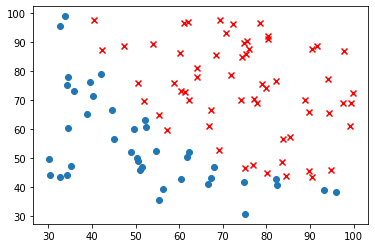

In [21]:
# 让我看看长什么样.jpg
data1_admitted = data1[data1['admitted'] == 1]
data1_unadmitted = data1[data1['admitted'] == 0]
plt.scatter(data1_admitted['exam1'], data1_admitted['exam2'], color='red', marker='x')
plt.scatter(data1_unadmitted['exam1'], data1_unadmitted['exam2'])

In [16]:
# sigmoid 启动！
def sigmoid(z):
    return 1/(1 + np.exp(-z))

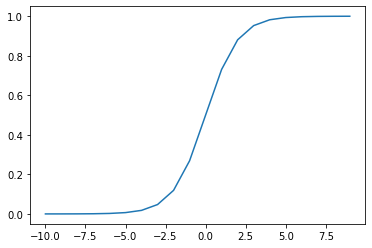

In [24]:
# 快速检查
nums = np.arange(-10, 10)
plt.plot(nums, sigmoid(nums))

$$ J(w,b) = -\frac{1}{m}\sum_{i=1}^{m}[y log(g(wx+b)) + (1-y)log(1-g(wx+b))] $$

In [64]:
def computeCost(X, y, w, b):
    first = np.multiply(y, np.log(sigmoid(X.dot(w) + b)))
    second = np.multiply(1 - y, np.log(1 - sigmoid(X.dot(w) + b)))
    return -np.mean(first + second)

$$ \frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum_{i=1}^{m}(g(wx+b)-y)x $$

In [65]:
def gradientDescent(X, y, w, b, alpha, iters):
    cost = np.zeros(iters)
    for i in range(iters):
        error = sigmoid(X.dot(w) + b) - y
        w = w - alpha * np.mean(error[:,np.newaxis] * X, axis=0)
        b = b - alpha * np.mean(error)
        cost[i] = computeCost(X, y, w, b)
        if np.isnan(cost[i]):
            break
    return w, b, cost


In [89]:
X = data1.iloc[:, :-1]
y = data1.iloc[:, -1]
X = np.array(X)
y = np.array(y)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X.mean())/X.std()

In [98]:
w = np.array([0.01, 0.01])
b = 0.0

In [38]:
np.mean(X, axis=0)

array([65.64427406, 66.22199809])

In [97]:
alpha = 0.01
iters = 2000

In [99]:
w, b, cost = gradientDescent(X, y, w, b, alpha, iters)

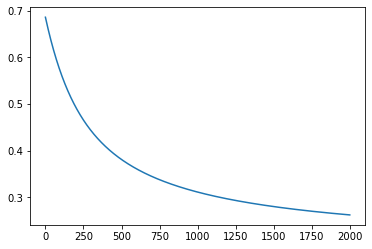

In [100]:
plt.plot(cost)

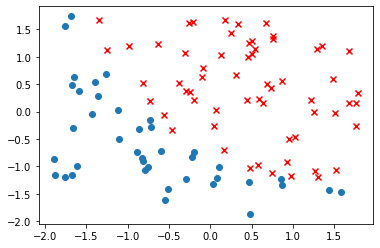

In [129]:
plt.scatter(X[data1_admitted.index][:,0], X[data1_admitted.index][:,1],color='red',marker='x')
plt.scatter(X[data1_unadmitted.index][:,0], X[data1_unadmitted.index][:,1])

In [130]:
# sigmoid反函数
def logit(g):
    return -np.log(1/g-1)

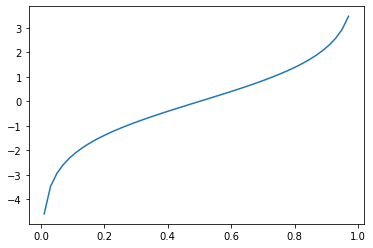

In [134]:
# 测试反函数
nums = np.arange(0.01, 0.99, step=0.02)
plt.plot(nums, logit(nums))

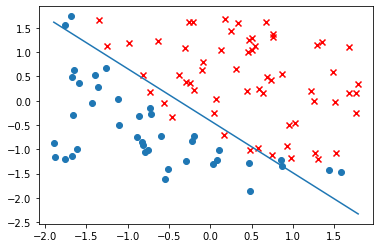

In [138]:
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_fit = np.linspace(X_min[0], X_max[0], 200)
Y_fit = logit(0.5)-(w[0]*X_fit + b)/w[1]
plt.scatter(X[data1_admitted.index][:,0], X[data1_admitted.index][:,1],color='red',marker='x')
plt.scatter(X[data1_unadmitted.index][:,0], X[data1_unadmitted.index][:,1])
plt.plot(X_fit,Y_fit)

状态良好，我们继续实现正则化逻辑回归吧

还是先导入数据

In [161]:
data2 = pd.read_csv('ex2data2.txt', names=['exam1', 'exam2', 'admitted'])
data2.head()

,exam1,exam2,admitted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [142]:
data2.describe()

,exam1,exam2,admitted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [159]:
data2_admitted = data2[data2['admitted']==1]
data2_unadmitted = data2[data2['admitted']==0]

In [161]:
X = data2.iloc[:,:-1]
X_mean = np.array(X.mean())
X_std = np.array(X.std())
X = np.array((X - X_mean) / X_std)
y = data2.iloc[:,-1]
y = np.array(y)

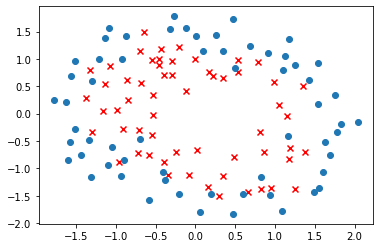

In [167]:
# 想图图了
plt.scatter(X[data2_admitted.index][:,0], X[data2_admitted.index][:,1], color='red', marker='x')
plt.scatter(X[data2_unadmitted.index][:,0], X[data2_unadmitted.index][:,1])

In [162]:
# 修改数据，变为n次多项式，还是想弄b
degree = 9
x1 = data2['exam1']
x2 = data2['exam2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree + 1):
    for j in range(i + 1):
        data2['F%d%d' % (i - j, j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('exam1', axis=1, inplace=True)
data2.drop('exam2', axis=1, inplace=True)

data2.head()



,admitted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F90,F81,F72,F63,F54,F45,F36,F27,F18,F09
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,2.446477e-12,3.338322e-11,4.555282e-10,6.215876e-09,8.481827e-08,0.000001,0.000016,0.000216,0.002941,0.040126
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,-5.075608e-10,3.748558e-09,-2.768473e-08,2.044638e-07,-1.510054e-06,0.000011,-0.000082,0.000608,-0.004493,0.033180
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,-9.298729e-07,3.012047e-06,-9.756630e-06,3.160370e-05,-1.023708e-04,0.000332,-0.001074,0.003479,-0.011270,0.036506
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,-1.466498e-04,1.963895e-04,-2.629995e-04,3.522020e-04,-4.716595e-04,0.000632,-0.000846,0.001133,-0.001517,0.002031
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,-2.471500e-03,2.242239e-03,-2.034245e-03,1.845545e-03,-1.674349e-03,0.001519,-0.001378,0.001250,-0.001134,0.001029


In [15]:
data2.describe()

,admitted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
count,118.000000,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,0.491525,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.502060,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,0.000000,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,0.000000,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,0.000000,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.000000,1.0,0.478970,0.646563,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.000000,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


老规矩，上代价函数，但这次需要加正则化，常数项不计算代价
$$ J(w,b) = -\frac{1}{m}\sum_{i=1}^{m}[y log(g(wx+b)) + (1-y)log(1-g(wx+b))] + \frac{\lambda}{2m}\sum_{i=1}^{n}w^2 $$

In [186]:
def costReg(X, y, w, b, learningRate):
    m = len(y)
    first = np.multiply(y, np.log(sigmoid(X.dot(w) + b)))
    second = np.multiply(1 - y, np.log(1 - sigmoid(X.dot(w) + b)))
    reg = learningRate / 2 / m * (np.sum(np.power(w, 2)))
    return -np.mean(first + second) + reg

$$ \frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum_{i=1}^{m}(g(wx+b)-y)x + \frac{\lambda}{m}w $$
$$ \frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum_{i=1}^{m}(g(wx+b)-y) $$

In [187]:
def gradientReg(X, y, w, b, alpha, learningRate, iters):
    m = len(y)
    cost = np.zeros(iters)
    for i in range(iters):
        error = sigmoid(X.dot(w) + b) - y
        w = w - alpha * (np.sum(error[:,np.newaxis] * X, axis=0) + learningRate * w) / m
        b = b - alpha * np.mean(error)
        cost[i] = costReg(X, y, w, b, learningRate)
        if np.isnan(cost[i]):
            break
    return w, b, cost

In [203]:
# 数据初始化
X = np.array(data2.iloc[:, 2:])
y = np.array(data2.iloc[:, 0])
w = np.zeros(X.shape[1])
b = 0.0

In [209]:
learningRate = 1.0
alpha = 0.03
iters = 20000

In [210]:
# 测试costReg
costReg(X, y, w, b, learningRate)

0.675901011602137

In [211]:
# 开始训练
w, b, cost = gradientReg(X, y, w, b, alpha, learningRate, iters)

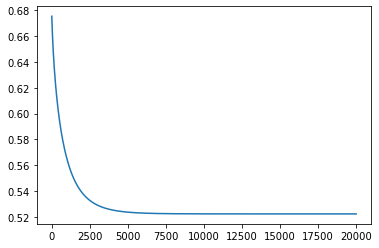

In [212]:
plt.plot(cost)

In [213]:
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)

x1, x2 = np.meshgrid(x1, x2)

z = np.zeros([*x1.shape, 0])

for i in range(1, degree + 1):
    for j in range(i + 1):
        z = np.concatenate((z, np.expand_dims(np.power(x1, i - j) * np.power(x2, j), axis=2)), axis=2)

z = np.tensordot(z, w, axes=(2, 0))
z = sigmoid(z + b)

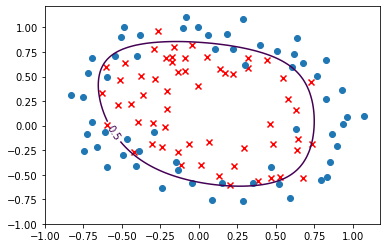

In [214]:
contour = plt.contour(x1, x2, z, levels=[0.5])
plt.clabel(contour, inline=True)
plt.scatter(X[data2_admitted.index][:,0], X[data2_admitted.index][:,1], color='red', marker='x')
plt.scatter(X[data2_unadmitted.index][:,0], X[data2_unadmitted.index][:,1])

补充：为什么逻辑回归使用sigmoid函数，sigmoid函数怎么推导

首先我们仍然设f(x)=wx+b，我们仍然先将已知的点映射到直线上。

此时我们把结果看为概率，即这件事发生的概率。

首先有一点我们能肯定，就是f(x)的值越大，这件事发生的概率就越高。

但概率一定是[0.0, 1.0]，我们需要一个函数，将f(x)映射到[0.0, 1.0]，且该函数必须满足单调递增。

在概率学中，一个事情发生的概率，可以大致转化为当前情况的样本数量除以所有情况的样本数量。

在数学中，我们就可以更加简化一点，有n种情况，对应$z_1$到$z_n$，求$z_m$在其中的概率，我们显然有公式。
$$ P(z_m) = \frac{z_m}{\sum_{i=1}^{n}{z_i}} $$ 
但z是可能为负数的，所有我们需要将其映射到正数区间，且满足单调递增。显然只有指数函数满足条件，公式变为
$$ P(z_m) = \frac{e^{z_m}}{\sum_{i=1}^{n}{e^{z_i}}} $$
而显然二元分类是特殊情况，结果情况只有两种，我们求一种情况，就相当于求了另一种情况
所有函数变为
$$ 
P(z_1) = \frac{e^{z_1}}{e^{z_0}+e^{z_1}}
$$

而我们也可以认为，假如情况为非$z_1$，那就是$z_0$，所以$z_0 = -z_1$

公式变为
$$ P(z_1) = \frac{e^{z_1}}{e^{-z_1}+e^{z_1}} $$
就可以得到概率公式g(z)
$$ \begin{aligned}
g(z) &= \frac{e^{z}}{e^{-z}+e^{z}} \\
&= \frac{1}{1+e^{-2z}}
\end{aligned} $$
而
$$ z= wx+b $$
系数被z吸收了，式子就变成了
$$ g(z) = \frac{1}{1+e^{-z}} $$